<a href="https://colab.research.google.com/github/alesandora/Proyek-Akhir/blob/main/Proyek_Analisis_Data_Alesandora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Alesandora Emanuella Pinto
- **Email:** alesandoraemanuellapinto@gmail.com
- **ID Dicoding:** M012D4KX2339

## Menentukan Pertanyaan Bisnis

1.   Which customers have ordered products recently?
2.   Which customers purchase the product most frequently?
3.   Which customer has the highest monetery value?

## Import Semua Packages/Library yang Digunakan

Before we start working on this project, we need to call all the required libraries. Here is the code to do so.

In [272]:
import pandas as pd
import numpy as np
import sqlalchemy as sqla

Here is the command to add the required data from GitHub

In [273]:
!wget https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/sellers_dataset.csv
!wget https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/products_dataset.csv
!wget https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/customers_dataset.csv
!wget https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/geolocation_dataset.csv
!wget https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/order_items_dataset.csv
!wget https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/order_payments_dataset.csv
!wget https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/order_reviews_dataset.csv
!wget https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/orders_dataset.csv
!wget https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/product_category_name_translation.csv

--2024-03-05 08:15:55--  https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/sellers_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174703 (171K) [text/plain]
Saving to: ‘sellers_dataset.csv.2’

sellers_dataset.csv 100%[===================>] 170.61K  --.-KB/s    in 0.01s   

2024-03-05 08:15:55 (11.1 MB/s) - ‘sellers_dataset.csv.2’ saved [174703/174703]

--2024-03-05 08:15:55--  https://raw.githubusercontent.com/alesandora/Proyek-Akhir/main/products_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

## Data Wrangling

Data wrangling is a process or collection of activities that include data collection (Gathering data), data assessment (Assessing data), and data cleaning (Cleaning data) before the data is used in the data analysis process. The goal is to ensure that the data to be used in the analysis is of good quality, well structured, and free from errors or anomalies. By performing data wrangling effectively, data analysts can minimize the risk of errors in the analysis, improve the accuracy of the results, and enable better decision-making based on the information obtained from the data. In addition, data wrangling can also help in identifying and dealing with formatting discrepancies, duplication, or missing values in a dataset, thus enabling more efficient and effective use of data in different types of data analysis.

### Gathering Data

The data collection stage begins with the data gathering process. In this process, all the data needed to answer all the questions or business problems that have been raised at the beginning will be collected and read. Then we will call all the necessary data from the Data that we called from Github in the preparation stage.

In [274]:
nama_file = "customers_dataset.csv"
customers_df = pd.read_csv(nama_file)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [275]:
nama_file = "geolocation_dataset.csv"
geolocation_df = pd.read_csv(nama_file)
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [276]:
nama_file = "order_items_dataset.csv"
order_items_df = pd.read_csv(nama_file)
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [277]:
nama_file = "order_payments_dataset.csv"
order_payments_df = pd.read_csv(nama_file)
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [278]:
nama_file = "order_reviews_dataset.csv"
order_reviews_df = pd.read_csv(nama_file)
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [279]:
nama_file = "orders_dataset.csv"
orders_df = pd.read_csv(nama_file)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [280]:
nama_file = "product_category_name_translation.csv"
product_category_name_translation_df = pd.read_csv(nama_file)
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [281]:
nama_file = "products_dataset.csv"
products_df = pd.read_csv(nama_file)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [282]:
nama_file = "sellers_dataset.csv"
sellers_df = pd.read_csv(nama_file)
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

After all the required data has been collected, the next process is to assess the data. This process is done to assess the quality and structure of the data. In addition, this process also aims to identify various problems contained in the data, such as missing values, unstandard values, etc. It is important to check for data duplication in each data, to help with identification.

In [283]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


If you pay attention, the amount of data in customers_df is complete or in other words, there are no missing values in it. However, there is a difference in data type for the customer_zip_code_prefix column. So let's check whether the column is really an integer data type or not.

In [284]:
print("Jumlah duplikasi: ",customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


It can be seen that the data contained in customer_zip_code_prefix is an integer data type. So there is no oddity in the result. This shows that there is no duplication and odd values in customer_df.

In [285]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In the product_df data, it can be seen that the RangeIndex value has a different value. This arises because there are missing values in the data. Then we will do the missing value checking stage.

In [286]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

The result above is an example of output from checking for missing values. In this example, we find quite a lot of missing values in the product_category_name, product_name_lenght, product_description_lenght, and product_photos_qty columns. Then the next problem we have to check is data duplication. To check this, we can run the following code.

In [287]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


After running the code above, no duplicate data is found, but a lot of data is missing, so we will process the product_df data again in data cleaning.

In [288]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


When viewed like there is no problem with geolocation_df data. This can be seen from the same RangeIndex of all data contained in the geolocation_df data. However, it is important for us to check for data duplication.

In [289]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


It turns out that there is a lot of duplicated data here. So later we will clean the geolocation_df data in the cleaning stage.

In [290]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


After assessing, there is no problem with sellers_df data. This can be seen from the same RangeIndex of all data contained in the geolocation_df data. So there is no missing or odd data.

In [291]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [292]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In the orders_df data, it can be seen that the RangeIndex value has a different value. This arises because there are missing values in the data. Then we will do the missing value checking stage.

In [293]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

The result above is an example of output from checking for missing values. In this example, we find quite a lot of missing values in the order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date. Then the next problem we have to check is data duplication. To check this, we can run the following code.

In [294]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


After running the code above, no duplicate data is found, so there is no oddity in the result. This shows that there is no duplication and odd values in orders_df.

In [295]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In the order_reviews_df data, it can be seen that the RangeIndex value has a different value. This arises because there are missing values in the data. Then we will do the missing value checking stage.

In [296]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

The result above is an example of output from checking for missing values. In this example, we find quite a lot of missing values in the review_comment_title and review_comment_message. Then the next problem we have to check is data duplication. To check this, we can run the following code.

In [297]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


After running the code above, no duplicate data is found, so there is no oddity in the result. This shows that there is no duplication and odd values in order_reviews_df.

In [298]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [299]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [300]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [301]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [302]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [303]:
print("Jumlah duplikasi: ",product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Cleaning Data

If in the previous process we find problems such as missing data or duplication in the data, these problems must be cleaned up before entering the data analysis stage.

In the geolocation_df data, previously there was a lot of duplication in this data. Then we will clean up the duplicated data. Here is the code:

In [304]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


Now the geolocation_df data has no duplicated data. Then we will continue to the product_df data, which in the previous process, the product_df data has a missing value that must be handled. The handling is by using the imputation method to handle missing values. In the imputation method, we will use a specific value to replace the missing value.

In [305]:
products_df[products_df.product_category_name.isna()]
products_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In the imputation method, the dominant value will be used to replace the missing value. The value to be replaced is the cama_mesa_banho data. Here is the code

In [306]:
products_df.fillna(value="cama_mesa_banho", inplace=True)

To ensure the above process works properly, run the code again to identify missing values as follows. If the missing value removal process is successful, the following result will be obtained.

In [307]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Next, do the same process for the orders_df data

In [308]:
orders_df[orders_df.order_delivered_customer_date.isna()]
orders_df.order_delivered_customer_date.value_counts()

2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: order_delivered_customer_date, Length: 95664, dtype: int64

In [309]:
orders_df.fillna(value="2018-05-08 23:38:46", inplace=True)

In [310]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [311]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]
order_reviews_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [312]:
order_reviews_df.fillna(value="Recomendo", inplace=True)

In [313]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

This completes the data cleaning stage. All the missing values or duplicates in the data have been dealt with. Then the data is ready to be analyzed

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is the stage of exploring the cleaned data to gain insights and answer analysis questions.

### Explore ...

In [314]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [315]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
81315,5231b1faaf0bc107b97fb0c764f2ed76,69c55e1fb63d49b22cfd5d439497f846,86990,marialva,PR,Active
84021,ad8fc75900ecf887ae4286d57123d51f,4ef5a0b80908b617ba5e563a05c52095,88820,icara,SC,Active
38028,02adbe89ad145c99f20d1f715635c7bc,ee2e6bc257be86dc7ddd9e85736cc5ec,37260,perdoes,MG,Active
31032,1be6b7bf6e6dbf197e6018642ee2948b,a052affc7a7b3ec84ee042f41a1239a1,60764,fortaleza,CE,Active
75369,a261571e982fcbdd11ed1e4814f709df,e876149e8061c041c42de31b4b74da37,38050,uberaba,MG,Active


In [316]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-05-08 23:38:46,2018-05-08 23:38:46,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2968,522


In [317]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


## Visualization & Explanatory Analysis

So, even though we have a DataFrame that contains the information needed to answer this first question, but we still need to display the results to make it easier for others to understand the information from the DataFrame, we need to create a data visualization.

### Question 1: Which customers have ordered products recently?

In [318]:
order_order_payments_df = pd.merge(
    left=orders_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df = pd.merge(
    left=order_order_payments_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

The code aims to combine data from three different DataFrames, `namely orders_df`, `order_payments_df`, and `customers_df`, to form one complete and cohesive DataFrame. By performing data fusion, we can have access to more complete and detailed information about orders, payments, and customers together enabling better analysis and understanding of the interaction between customers and order processes within an e-commerce platform.

In [319]:
all_df["order_delivered_customer_date"] = pd.to_datetime(all_df["order_delivered_customer_date"])

This code aims to convert the "order_delivered_customer_date" column in DataFrame `all_df` to datetime data type using the `pd.to_datetime()` function. By converting this column to datetime data type, we can easily perform time analysis related to the delivery of orders to customers, such as calculating the delivery time or grouping orders by specific time periods. This allows further analysis of shipping patterns and customer shipping performance within the e-commerce platform.

In [320]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_delivered_customer_date": "max",  # Assuming "order_date" is now "order_delivered_customer_date"
    "order_id": "nunique",
    "payment_value": "sum"  # Assuming "total_price" is now "payment_value"
})

# Rename columns
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Calculate recency
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_delivered_customer_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Drop unnecessary column
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Display the resulting DataFrame
print(rfm_df.head())

                        customer_id  frequency  monetary  recency
0  00012a2ce6f8dcda20d059ce98491703          1    114.74      323
1  000161a058600d5901f007fab4c27140          1     67.41      449
2  0001fd6190edaaf884bcaf3d49edf079          1    195.42      590
3  0002414f95344307404f0ace7a26f1d5          1    179.35      399
4  000379cdec625522490c315e70c7a9fb          1    107.01      187


This code aims to create a new DataFrame that represents RFM (Recency, Frequency, Monetary) analysis of customer transaction data in an e-commerce platform. First, the data is grouped by "customer_id" and then the RFM values are calculated: recency, frequency, and monetary. Next, the column "order_delivered_customer_date" is assumed to be the column indicating the last date of the order, "order_id" is calculated as the number of unique orders for each customer, and "payment_value" is calculated as the total payment value for each customer. Then, the "max_order_timestamp" column is renamed to "max_order_date", converted to date format, and the time difference between the last order date and the current date is calculated as the recency value. Finally, the "max_order_timestamp" column is deleted because it is no longer needed, and the result DataFrame is displayed. This RFM analysis aims to help in further understanding the behavior and value of each customer in the e-commerce platform.

<ipython-input-321-b4a286609a89>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors,)


([0, 1, 2, 3, 4],
 [Text(0, 0, '033fab69968b0d69099d64423831a236'),
  Text(1, 0, '27ae7c8a8fc20ce80d96f01b6f19961b'),
  Text(2, 0, '9e83d47684eb1a58b1c31830f5de10ac'),
  Text(3, 0, 'ffa87b4246c4848711afb512bd51f161'),
  Text(4, 0, '1409b2945191b7aff1975ba2ce9918c5')])

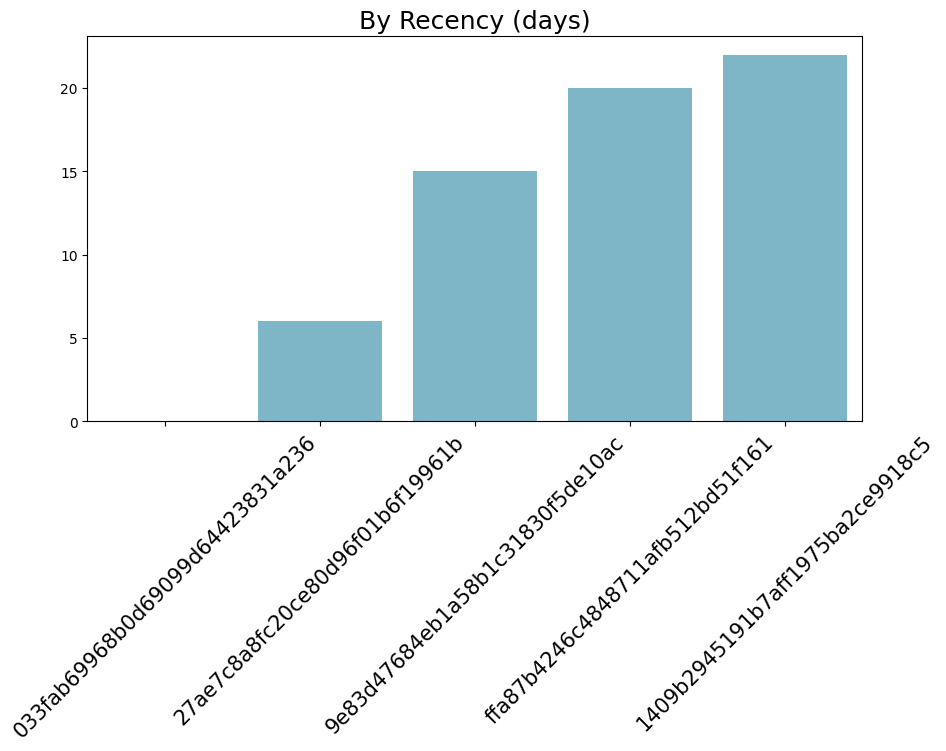

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

plt.figure(figsize=(10, 5))

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors,)
plt.ylabel(None)
plt.xlabel(None)
plt.title("By Recency (days)", loc="center", fontsize=18)
plt.tick_params(axis ='x', labelsize=15)
plt.xticks(rotation=45)

This code creates a bar plot to display the five customers with the lowest recency values from DataFrame `rfm_df`. The purpose is to visualize those customers who have recently made a transaction in the e-commerce platform.

### Question 2: Which customers purchase the product most frequently?

<ipython-input-322-07dc7eda4e35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


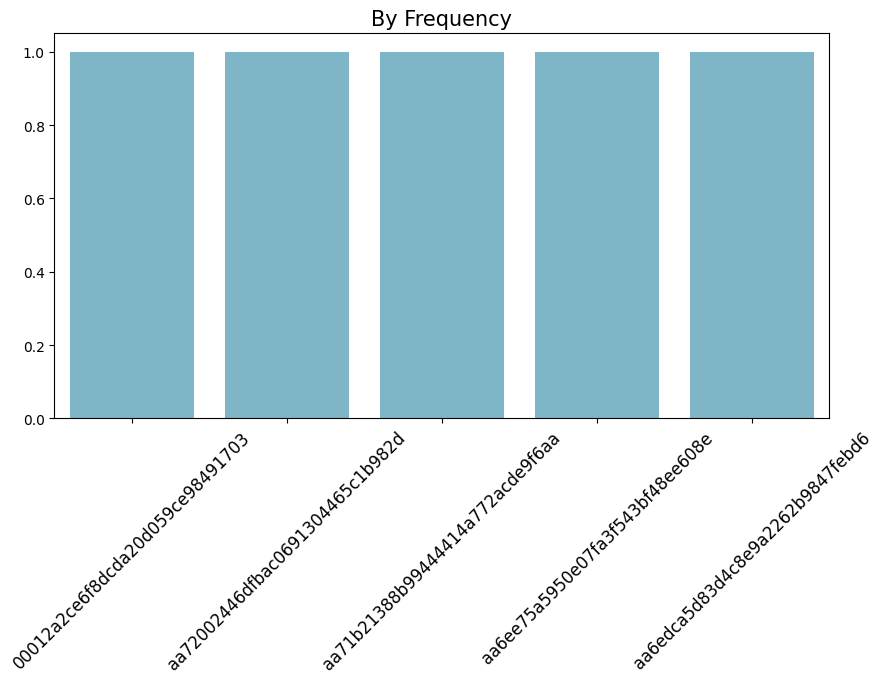

In [322]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="frequency",
    x="customer_id",
    data=rfm_df.sort_values(by="frequency", ascending=True).head(5),
    palette=colors
)

plt.title("By Frequency", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

The code will display the five customers with the highest order frequency, which are the customers who place the most orders on the e-commerce platform. The result shows they are all equal in frequency.

### Question 3: Which customer gives the store the most income?

<ipython-input-323-9fcd64d22fca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


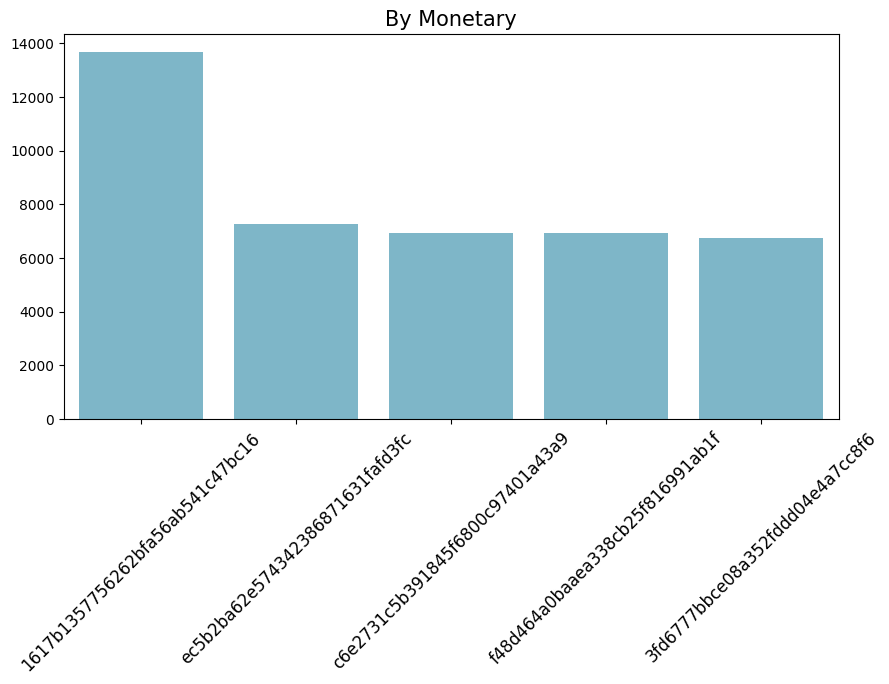

In [323]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="monetary",
    x="customer_id",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors
)

plt.title("By Monetary", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

The code aims to create a bar plot that displays the five customers with the highest monetary value from DataFrame `rfm_df`. This plot helps in seeing the customers who contribute the most in terms of total purchase value or revenue in the e-commerce platform.

In [324]:
all_df.to_csv("all.csv",index=False)

## Conclusion

- Conclusion Question 1 =
The customer who recently ordered the product is the customer with id 033fab69968b0d69099d64423831a236.


- Conclusion Question 2 = All customers have a frequency of ordering 1 time.


- Conclusion Question 3 = The customer who gives the most income to the company is the customer with id 1617b1357756262bfa56ab41c47bc16 because he gives the most money to the order.

So, the last step is to display the analysis results on the dashboard. But first to create code in a new file called dashboard.py. After that run the code below

In [325]:
!pip install streamlit babel -q
!wget -q -O - ipv4.icanhazip.com
! streamlit run dashboard.py & npx localtunnel --port 8501

34.125.178.191
[..................] / rollbackFailedOptional: verb npm-session bb84c3dae345c91


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.178.191:8501

npx: installed 22 in 2.654s
your url is: https://slimy-ideas-slide.loca.lt
/content/dashboard.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/content/dashboard.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])


In [328]:
!pip freeze > requirements.txt